# TASK 4 : Exploratory Data Analysis - Terrorism

## SHIVAM GUPTA

###  #GRIPJAN21 

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION

#### Problem : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ and  try to find out the hot zone of terrorism.

What all security issues and insights you can derive by EDA? 

#### Data Source : https://bit.ly/2TK5Xn5

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [71]:
#Reading data
df_terror=pd.read_csv(r"C:\Users\SHIVAM GUPTA\Downloads\Global_terrorism\globalterrorismdb.csv",encoding='latin1')

In [27]:
df_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
df_terror.shape

(181691, 135)

In [30]:
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [31]:
df_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [32]:
df_terror.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [34]:
df_terror.isnull == True

False

In [35]:
df_terror.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [3]:
df_terror.drop('eventid',axis=1,inplace=True)

In [38]:
df_terror.tail()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2017,12,31,NaN,0,NaN,92,India,6,South Asia,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
#df_terror.describe().T
df_terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df_terror.describe(include = 'object')

,approxdate,resolution,country_txt,region_txt,provstate,city,location,summary,alternative_txt,attacktype1_txt,...,divert,kidhijcountry,ransomnote,hostkidoutcome_txt,addnotes,scite1,scite2,scite3,dbsource,related
count,9239,2220,181691,181691,181270,181257,55495,115562,29011,181691,...,324,3305,514,10991,28289,115500,76933,43516,181691,25038
unique,2244,1859,205,12,2855,36674,44109,112492,5,9,...,143,217,387,7,15429,83988,62263,36090,26,14306
top,"September 18-24, 2016",8/4/1998,Iraq,Middle East & North Africa,Baghdad,Unknown,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",Insurgency/Guerilla Action,Bombing/Explosion,...,Unknown,Colombia,0,Unknown,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,"201612010023, 201612010024, 201612010025, 2016..."
freq,101,18,24636,50474,7645,9775,142,100,23410,88255,...,27,687,36,3606,1607,205,134,139,78002,80


In [5]:
#checking the unique values
df_terror.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [8]:
#find pairwise correlation of columns.
df_terror.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


## Analysis of Dataset

### Number of Attacks based on Country. 

In [7]:
terror_attacks = df_terror['country_txt'].value_counts()
country_name = terror_attacks.index[0]
Number_of_attacks = terror_attacks.values[0]
print("Top 10 countries total number of terror attacks along with its Name")
terror_attacks.head(10)

Top 10 countries total number of terror attacks along with its Name


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

In [11]:
terror_attacks.tail()

Vatican City           1
Wallis and Futuna      1
New Hebrides           1
Falkland Islands       1
Antigua and Barbuda    1
Name: country_txt, dtype: int64

### 'Iraq' has maximum number of terror attacks and 'Antigua and Barbuda' has minimum number of terror attacks. 

## India is on 4th Place in this list. 

In [9]:
terror_attacks.size

205

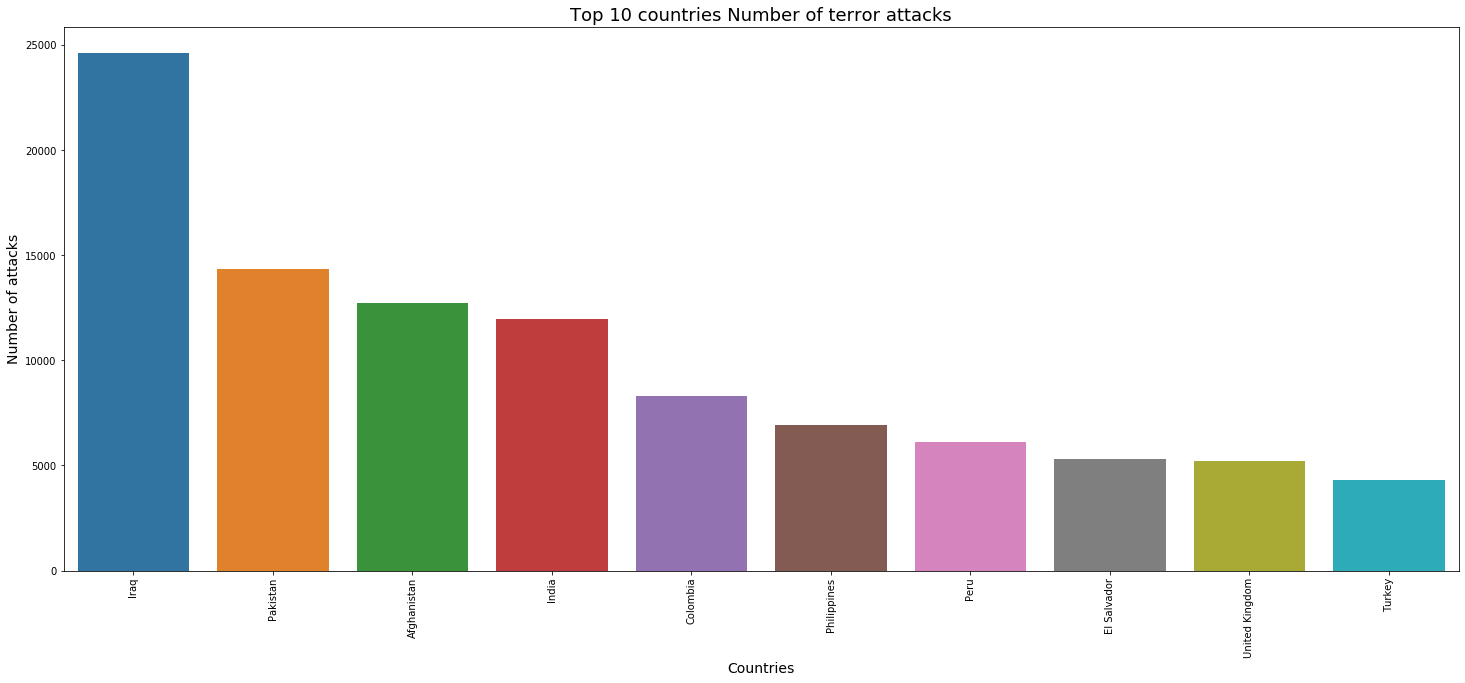

In [22]:
#visualize the top 10 terror attacks countries
plt.figure(figsize=(25,10))
sns.barplot(df_terror['country_txt'].value_counts()[:10].index,df_terror['country_txt'].value_counts()[:10].values)
plt.title("Top 10 countries Number of terror attacks",fontsize=18)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Number of attacks',fontsize=14)
plt.xticks(rotation = 90)
plt.show()

## Year the most number of terrorist attacks happened in these countries

In [17]:
#Year the most number of terrorist attack happened in these countries.

bool_arr=df_terror['country_txt'] == country_name
terror_y=df_terror[bool_arr]
year=terror_y['iyear'].value_counts()

#print("Country_Name,","No._of_attacks,","Highest_attacks_in_year")
#for i in range(0,10):
 #   print(terror_attacks.index[i]," , ",terror_attacks.values[i]," , ",terror_y['iyear'].value_counts().index[i])
    
print('Year the most number of terrorist attack happened in top 10 terror attacks countries.')
year.head(10)

Year the most number of terrorist attack happened in top 10 terror attacks countries.


2014    3933
2016    3360
2013    2852
2015    2751
2017    2466
2012    1437
2011    1308
2010    1179
2009    1137
2008    1106
Name: iyear, dtype: int64

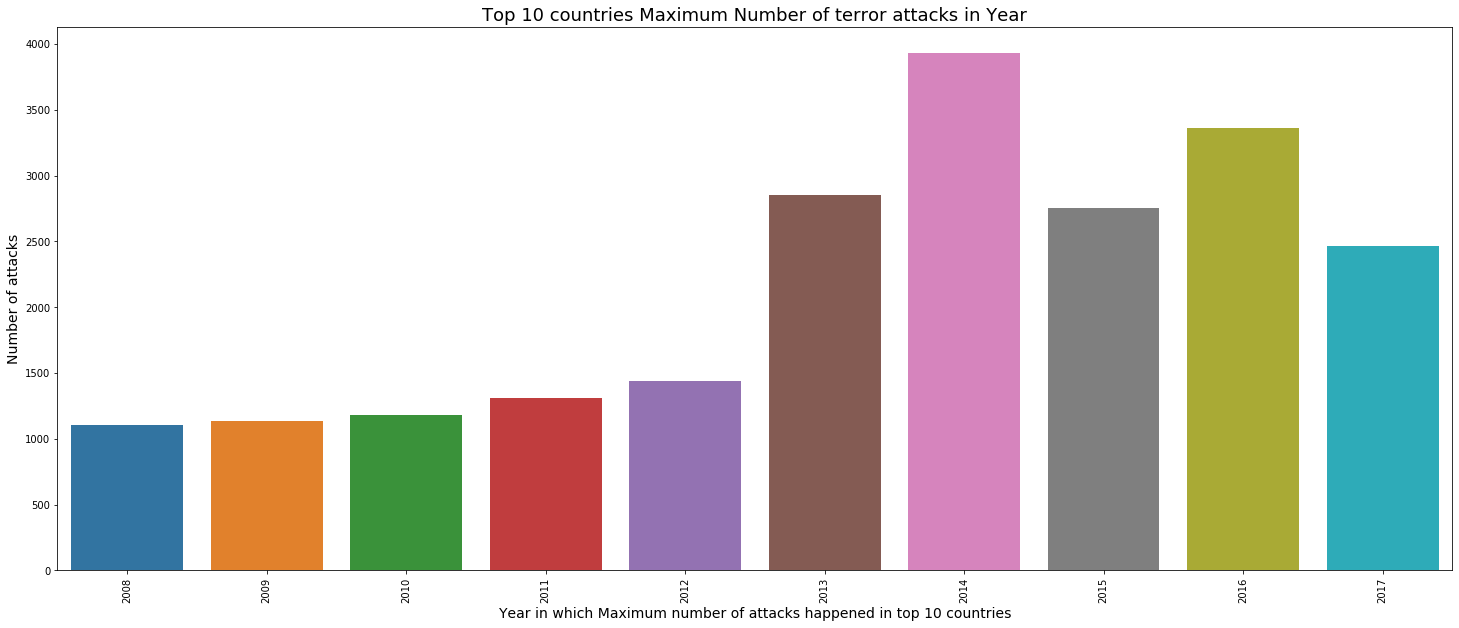

In [29]:
#visualize the top 10 terror attacks countries
plt.figure(figsize=(25,10))
sns.barplot(terror_y['iyear'].value_counts()[:10].index,terror_y['iyear'].value_counts()[:10].values)
plt.title("Top 10 countries Maximum Number of terror attacks in Year",fontsize=18)
plt.xlabel('Year in which Maximum number of attacks happened in top 10 countries',fontsize=14)
plt.ylabel('Number of attacks',fontsize=14)
plt.xticks(rotation = 90)
plt.show()

### Here we can see, In 'Iraq' most number of terror attacks happened in 2014 and in 'India' most no. of attacks happened in 2015.

## Number of terror attacks based on states.

In [31]:
#Most no. of terror attacks based on states
terror_state = df_terror['provstate'].value_counts()
terror_state.head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: provstate, dtype: int64

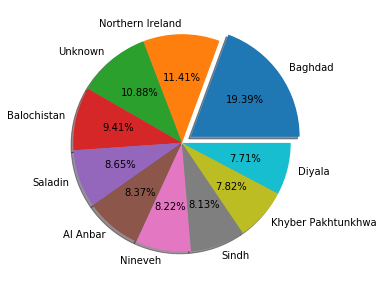

In [35]:
#visualization of number of terror attacks in top 10 states.
plt.figure(figsize=(10,5))
expd=(0.1,0,0,0,0,0,0,0,0,0)   #Explode
plt.pie(list(terror_state.head(10)),labels=list(terror_state.keys()[0:10]),shadow=True,explode=expd,radius=1,autopct='%0.2f%%')
plt.show()

### Baghdad is most affected state due to terror attacks. 

## Number of terror attacks based on cities. 

In [36]:
terror_cities = df_terror['city'].value_counts()
terror_cities.head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

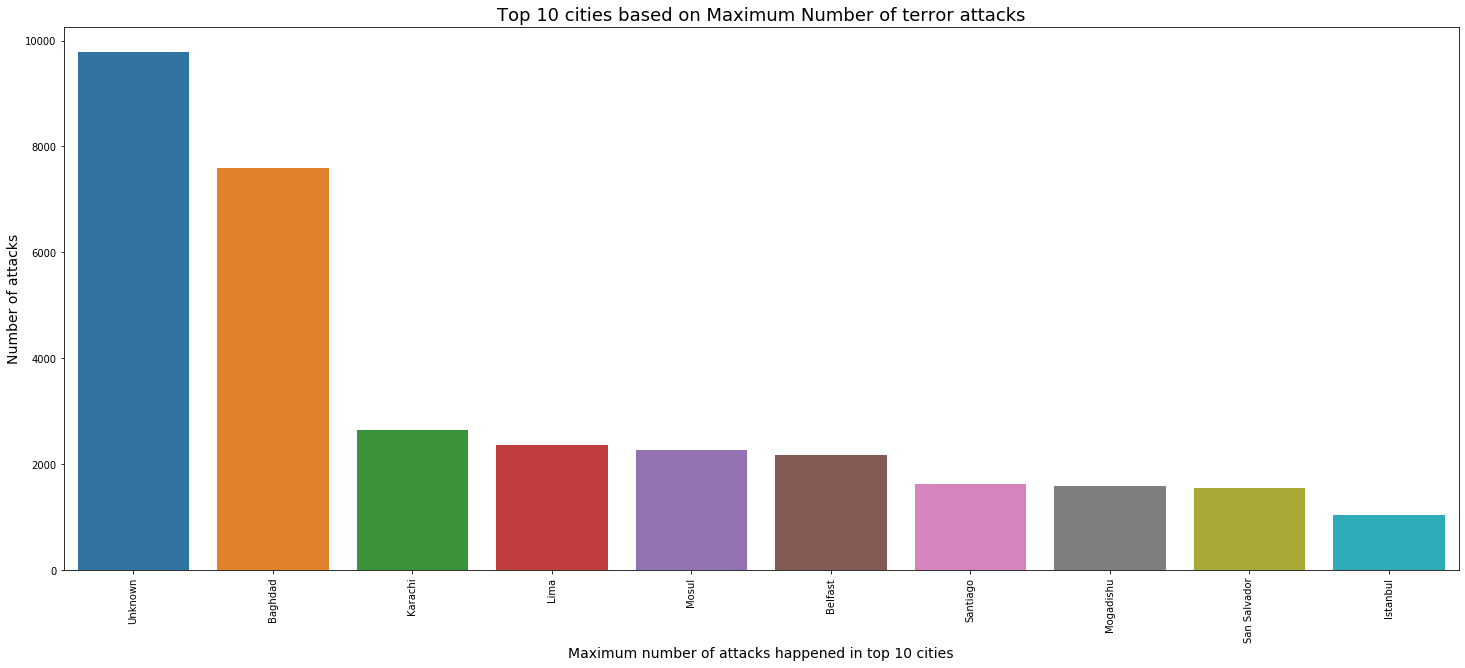

In [44]:
#visualize the top 10 terror attacks cities
plt.figure(figsize=(25,10))
sns.barplot(df_terror['city'].value_counts()[:10].index,df_terror['city'].value_counts()[:10].values)
plt.title("Top 10 cities based on Maximum Number of terror attacks",fontsize=18)
plt.xlabel('Maximum number of attacks happened in top 10 cities',fontsize=14)
plt.ylabel('Number of attacks',fontsize=14)
plt.xticks(rotation = 90)
plt.show()

### Baghdad and karachi are two most affected cities due to terror attacks.

## Terror attacks based on region 

In [45]:
terror_region=df_terror['region_txt'].value_counts()
terror_region.head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: region_txt, dtype: int64

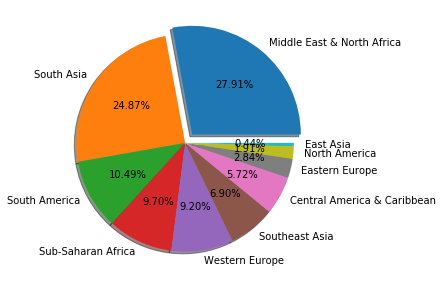

In [46]:
plt.figure(figsize=(10,5))
expd=(0.1,0,0,0,0,0,0,0,0,0)   #Explode
plt.pie(list(terror_region.head(10)),labels=list(terror_region.keys()[0:10]),shadow=True,explode=expd,radius=1,autopct='%0.2f%%')
plt.show()

### 'Middle East & North Africa' and 'South Asia' are two regions has most number of terror attacks.   

## Number of Terror attacks based on years. 

In [47]:
terror_year=df_terror['iyear'].value_counts()
terror_year.head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: iyear, dtype: int64

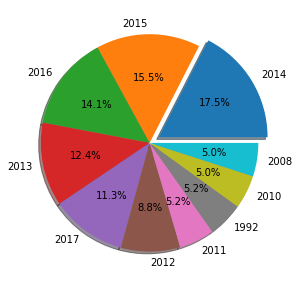

In [48]:
plt.figure(figsize=(10,5))
expd=(0.1,0,0,0,0,0,0,0,0,0)   #Explode
plt.pie(list(terror_year.head(10)),labels=list(terror_year.keys()[0:10]),shadow=True,explode=expd,radius=1,autopct='%0.1f%%')
plt.show()

### Maximum number of terror attacks happened in year 2014.

### Terror attacks are Gradually increases since 2011.  

##  Analysis of Attack type

In [49]:
terror_attacktype=df_terror['attacktype1_txt'].value_counts()
terror_attacktype.head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

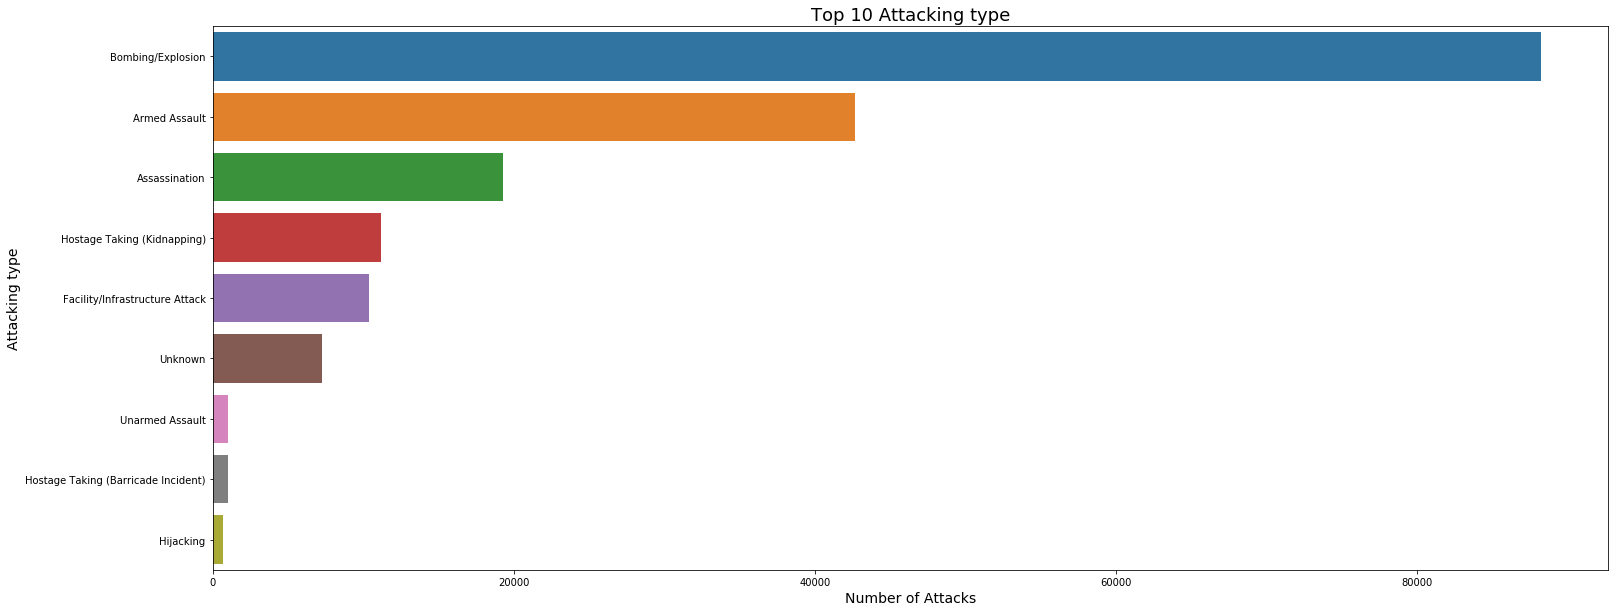

In [50]:
#visualize the top 10 Attacking type
plt.figure(figsize=(25,10))
sns.barplot(df_terror['attacktype1_txt'].value_counts()[:10].values,df_terror['attacktype1_txt'].value_counts()[:10].index)
plt.title("Top 10 Attacking type",fontsize=18)
plt.xlabel('Number of Attacks',fontsize=14)
plt.ylabel('Attacking type',fontsize=14)
plt.show()

### Bombing/Explosion have been most used attacking type in terror attacks.

## Analysis of attacking target type.

In [54]:
terror_targetType=df_terror['targtype1_txt'].value_counts()
terror_targetType.head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: targtype1_txt, dtype: int64

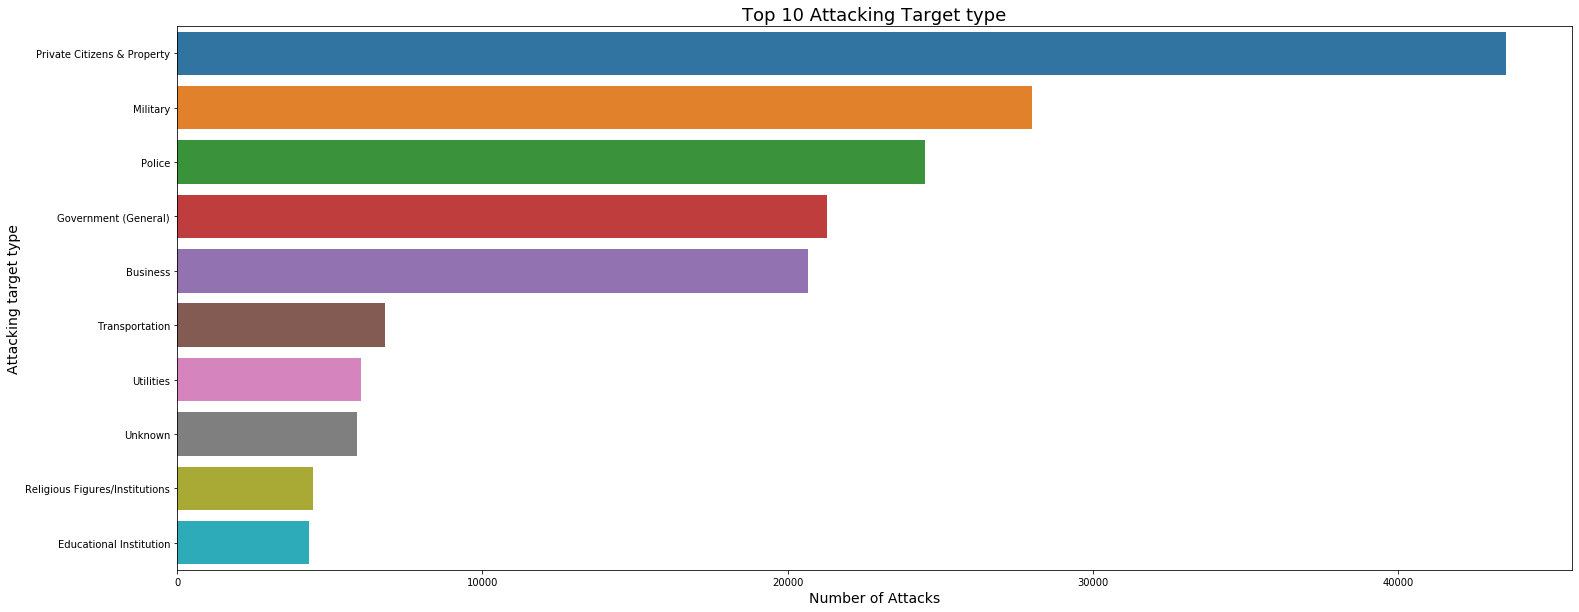

In [55]:
#visualize the top 10 Attacking type
plt.figure(figsize=(25,10))
sns.barplot(df_terror['targtype1_txt'].value_counts()[:10].values,df_terror['targtype1_txt'].value_counts()[:10].index)
plt.title("Top 10 Attacking Target type",fontsize=18)
plt.xlabel('Number of Attacks',fontsize=14)
plt.ylabel('Attacking target type',fontsize=14)
plt.show()

### Here we can see,'Private Citizens & Property' and 'Military' are two most Targeted type.

## Analysis of kind of Weapons used in terror attacks.

In [56]:
terror_weapons=df_terror['weaptype1_txt'].value_counts()
terror_weapons.head(10)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weaptype1_txt, dtype: int64

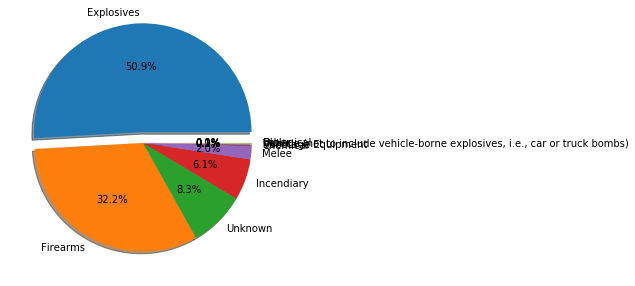

In [57]:
plt.figure(figsize=(10,5))
expd=(0.1,0,0,0,0,0,0,0,0,0)   #Explode
plt.pie(list(terror_weapons.head(10)),labels=list(terror_weapons.keys()[0:10]),shadow=True,explode=expd,radius=1,autopct='%0.1f%%')
plt.show()

### 50.9% of Explosives used as a Weapon.  

## Analysis on the based of terror groups.  

In [60]:
#based on terror Group
terror_group=df_terror['gname'].value_counts()
terror_group.head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

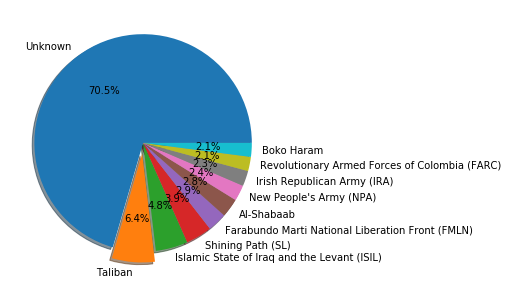

In [61]:
plt.figure(figsize=(10,5))
expd=(0,0.1,0,0,0,0,0,0,0,0)   #Explode
plt.pie(list(terror_group.head(10)),labels=list(terror_group.keys()[0:10]),shadow=True,explode=expd,radius=1,autopct='%0.1f%%')
plt.show()

### 'Taliban' and  'Islamic State of Iraq and the Levant' are two terror groups attacks mostly.

## Analysis of Number of peoples killed and wounded in these terror attacks. 

In [58]:
terror_killed=df_terror['nkill'].value_counts()
terror_killed.head(10)

0.0     88149
1.0     36576
2.0     14147
3.0      7738
4.0      4961
5.0      3565
6.0      2552
7.0      1960
8.0      1495
10.0     1192
Name: nkill, dtype: int64

In [69]:
#Analize Maximum Number of kills in Country by single terror attack. 
df_copy=df_terror.copy()

max_killed=df_terror['nkill'].max()
bool_arr=df_terror['nkill'] == max_killed
df_terror=df_terror[bool_arr]
most_killed=int(max_killed)
print(most_killed,df_terror.country_txt.values[0],df_terror.gname.values[0])

1570 Iraq Islamic State of Iraq and the Levant (ISIL)


### 1570 people killed in Iraq by ISIL terror group attack is the Maximum number of killed people in attack.  

In [59]:
terror_wounded=df_terror['nwound'].value_counts()
terror_wounded.head(10)

0.0     103275
1.0      16033
2.0      10219
3.0       7303
4.0       4880
5.0       3820
6.0       2856
7.0       2435
8.0       1821
10.0      1379
Name: nwound, dtype: int64

In [75]:
df_copy.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


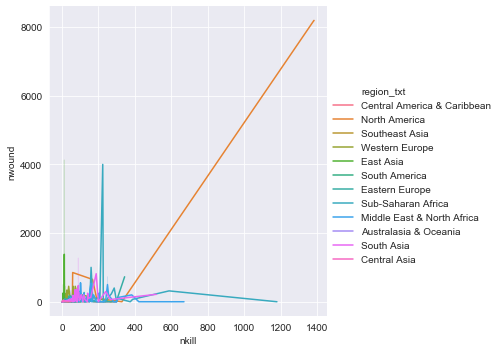

In [90]:
#killed vs wounded
sns.set_style(style="darkgrid")
sns.relplot(x ='nkill', y='nwound',hue='region_txt',kind = "line", data=df_terror)

# Final Conclusion:

#### 1. Maximum number of terror attacks happened in IRAQ. 

#### 2. BAGHDAD and KARACHI are two most affected cities due to terror attacks.

#### 3. 'Middle East & North Africa' and 'South Asia' are two most affected regions across globe. 

#### 4. Terror attacks gradually increases since 2011 and in 2014 maximum number of terror attacks has happened worldwide. 

#### 5. Bombing/Explosion have been the most used Attack type during terror attacks.

#### 6. 'Private Citizens & Property' and 'Military' are two most Targeted types in terror attacks.

#### 7. 'Taliban' and 'Islamic State of Iraq and the Levant' are two terror groups has did maximum number of terror attacks across globe.


# THANK YOU!